# Dataset From Kaggle

In [ ]:
# Installing kaggle module
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.7MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=d01a338f6c7a4d6467a4a6b524ed60dee0c8309f2e72c470f064f3a1f019c979
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
# Upload your kaggle.json file in here
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"achmadfachturrohman","key":"79203b315ee0e79e79b90b99847628d0"}'}

In [ ]:
# Creating a directory named .kaggle in root directory
!mkdir ~/.kaggle

# Coppying kaggle.json file into .kagle directory that you just created
!cp kaggle.json ~/.kaggle/

# Changing the persmission for kaggle.json file 
! chmod 600 ~/.kaggle/kaggle.json

# Downloading the datasets from kaggle (zip file) into root directory, the file name should be 'garbage-classification.zip'
!kaggle datasets download -d asdasdasasdas/garbage-classification

 93% 76.0M/82.0M [00:03<00:00, 25.6MB/s]
100% 82.0M/82.0M [00:03<00:00, 25.9MB/s]


In [ ]:
# extracting the zip file then save it to '/content/dataset'
from zipfile import ZipFile

with ZipFile('garbage-classification.zip', 'r') as zipObj:
  zipObj.extractall('/content/dataset')

# Dataset From GitHub

In [ ]:
# Installing split-folders module
!pip install split-folders tqdm

In [ ]:
# Cloning Machine_Learning branch from our git repo
!git clone -b Machine_Learning https://github.com/HansAnderson19/Trash-education.git

fatal: destination path 'Trash-education' already exists and is not an empty directory.


In [ ]:
# Using splitfolders module to split the data into 3 parts : train, val, test then saved to "/content/output"
import splitfolders
dataset_dir = '/content/Trash-education/Splitted_Without_Trash_Class'

In [ ]:
# Mounting your google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# load your model, since my model is in my gdrive, i use '/content/gdrive/MyDrive/Saved_model/V2' as my model directory
# you should use your own model's directory
# it's the folder that contain your model : assets and variable, as well the file with .pb extention
import tensorflow as tf
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Saved_model_ResNet50V2/V1')

In [ ]:
# Summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 8, 8, 2048)        23564800  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 5125      
Total params: 25,668,101
Trainable params: 17,074,181
Non-trainable params: 8,593,920
__________________________________

In [ ]:
# Creating testing dataset using flow_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32
TARGET_SIZE = (256,256)

testing_dir = '/content/Trash-education/Splitted_Without_Trash_Class/test'

testing_datagen = ImageDataGenerator(rescale=1/255)

testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
    target_size = TARGET_SIZE,
    color_mode='rgb',
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    shuffle = False
)

Found 242 images belonging to 5 classes.


In [ ]:
# Cheking the total image of each class in testing dataset
from collections import Counter

counter = Counter(testing_generator.classes)

print(testing_generator.class_indices)
print(counter.items()) 


{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}
dict_items([(0, 41), (1, 51), (2, 41), (3, 60), (4, 49)])


In [ ]:
# Evaluating the model using test dataset
the_loss, the_acc = model.evaluate(testing_generator)

print('Test Acc : ', the_acc)
print('Test Loss : ', the_loss)


8/8 [==============================] - 33s 247ms/step - loss: 0.2383 - accuracy: 0.9380
Test Acc :  0.9380165338516235
Test Loss :  0.23828265070915222


In [ ]:
# Predicting testing dataset
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(testing_generator)

In [ ]:
# Just some checking for the outputs
array = np.array(Y_pred)
print(array.shape)
print(Y_pred)

(242, 5)
[[9.9996257e-01 1.0633125e-05 1.4285595e-05 4.9766304e-06 7.5207827e-06]
 [9.3402225e-01 1.8497270e-02 1.2286914e-02 2.4998168e-02 1.0195466e-02]
 [9.9692684e-01 4.6309014e-04 3.1985430e-04 1.3937600e-03 8.9647324e-04]
 ...
 [1.2580650e-02 3.0358011e-01 5.1053065e-01 1.4446848e-02 1.5886183e-01]
 [4.5925062e-02 1.4882689e-02 1.4943218e-02 1.3484099e-02 9.1076499e-01]
 [3.8540468e-04 5.4914039e-04 4.6341745e-03 9.3041628e-04 9.9350089e-01]]


In [ ]:
# Y_pred_labels is the prediction your model gives.
Y_pred_labels = np.argmax(Y_pred, axis=1)
print('Y_pred_labels')
print(Y_pred_labels)
print(' ')

# true_labels is the true category/class/label of the image in testing dataset
print('true_labels')
print(testing_generator.classes)

Y_pred_labels
[0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 3 0 3 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 4
 4 4 4 4 4 4 2 4 4 4 2 4 4 3 4 4 4 2 4 4]
 
true_labels
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [ ]:
# Printing classification reports that contains precision, recall and f1-score
# using sklearn classification_reports (see documentations for details)
print(classification_report(testing_generator.classes, Y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        41
           1       1.00      0.96      0.98        51
           2       0.87      0.98      0.92        41
           3       0.89      0.98      0.94        60
           4       0.96      0.88      0.91        49

    accuracy                           0.94       242
   macro avg       0.94      0.94      0.94       242
weighted avg       0.94      0.94      0.94       242



Confusion matrix, without normalization
[[36  0  0  5  0]
 [ 0 49  1  0  1]
 [ 0  0 40  1  0]
 [ 0  0  0 59  1]
 [ 0  0  5  1 43]]
 


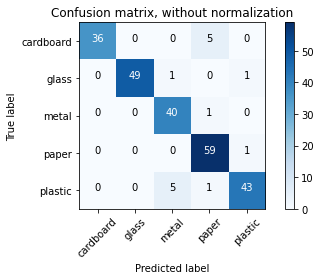

In [ ]:
import matplotlib.pyplot as plt
import itertools

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    print(' ')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cm = confusion_matrix(testing_generator.classes, Y_pred_labels)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['cardboard', 'glass', 'metal', 'paper', 'plastic'],
                      title='Confusion matrix, without normalization')

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

label_dict = {'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4}
reverse_label_dict = {}

for a,b in label_dict.items() :
  reverse_label_dict[b] = a
print('')
print(reverse_label_dict)
print('')

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  #plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #print(' ')
  #print(x.shape)

  images = np.vstack([x])
  classes = model.predict(images)
  labels = np.argmax(classes)

  print('{} is {}'.format(fn, str(reverse_label_dict[labels])))
  #print('')
  #print(classes)

Saving cardboard131.jpg to cardboard131.jpg
Saving glass17.jpg to glass17.jpg
Saving metal20.jpg to metal20.jpg
Saving paper45.jpg to paper45.jpg
Saving plastic22.jpg to plastic22.jpg

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic'}

cardboard131.jpg is paper
glass17.jpg is paper
metal20.jpg is paper
paper45.jpg is paper
plastic22.jpg is paper
